# Cálculo del valor de decisión óptimo para el caso de una regla de decisión ML en una observacion continua

## Consigna: 

Considere el siguiente problema de prueba de hipótesis entre dos hipótesis igualmente probables. Bajo la hipótesis $H=0$, la señal observable $Y$ es igual a $a+Z$ donde $Z$ es una variable aleatoria con la siguiente distribución laplaciana:

$f_Z(z) = \frac{1}{2}e^{-|z-\mu|}$, donde $\mu$ es la media de la variable $Z$.

Bajo la hipótesis $H = 1$, $Y$ viene dado por $-a+Z$. Vamos a suponer que $a$ es positivo.

1. Realice un programa en una Jupyter Notebook que dibuje las funciones de densidad de probabilidad $f_{Y|H}(y|0)$ y $f_{Y|H}(y|1)$.
2. Determine cualitativamente el nivel de decisión óptimo. Bajo que regla de decisión es óptimo?
3. Determine cuantitativamente el nivel de decisión óptimo.
4. Determine cuantitativamente la probabilidad de error $P_e$.

## Desarrollo:

### 1. Realice un programa en una Jupyter Notebook que dibuje las funciones de densidad de probabilidad $f_{Y|H}(y|0)$ y $f_{Y|H}(y|1)$

Para las siguientes hipotesis:

$H = 0 \sim f_{Y|H}(y|0) = \frac{1}{2}e^{-|y-\mu+a|}$

$H = 1 \sim f_{Y|H}(y|1) = \frac{1}{2}e^{-|y-\mu-a|}$

Se tiene que el valor de $\mu$ es la media de la variable $Z$, por ende debe ser un valor único, si reemplazamos en la funcion de distribución base $z = 0$ tenemos: $f_Z(0)= \frac{1}{2} e^{-|0-\mu|} = \frac{1}{2} e^{-|-\mu|}$ como se puede observar en el exponente $\mu$ devido al modulo tendrá distintos valores posibles en caso de ser distinto de 0, pero como debe ser un valor único, el único valor posible es $\mu = 0$, otra forma de calcular el valor del valor medio es con la ecuacion: $\mu = \int_{-\infin}^{\infin}z f_Z(z)dz$

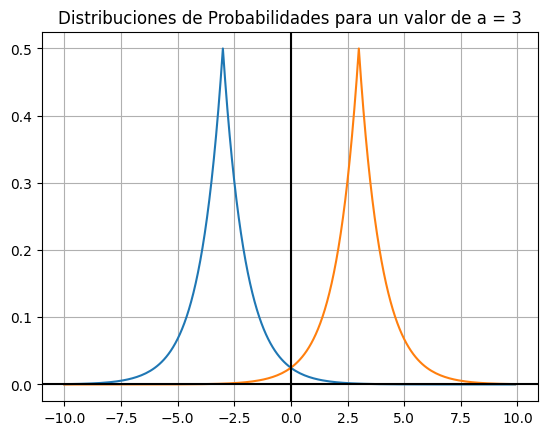

In [14]:
from math import e
import numpy as np
import matplotlib.pyplot as plt

def f0(y, a):
    return (1/2)*e**(-abs(y+a))

def f1(y, a):
    return (1/2)*e**(-abs(y-a))

y = np.arange(-10,10,0.1)

plt.title("Distribuciones de Probabilidades para un valor de a = 3")
plt.plot(y, [f0(i,3) for i in x])
plt.plot(y, [f1(i,3) for i in x])
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid()
plt.show()


### 2. Determine cualitativamente el nivel de decisión óptimo. Bajo que regla de decisión es óptimo?

Sin tener en cuenta el valor de $a$ (debido a que solo sabemos que es positivo $> 0$), el nivel de decisión óptimo seria en $z = 0$, a un valor mayor o igual a $z = 0$ correspondería a la hipótesis $\hat{H} = 1$. Bajo la regla de decisión ML este valor de decisión es óptimo, debido a que, gracias a conocer las funciones de distrubución podemos con cierto valor de confianza decir que la fuente es equiprobable, importando así en el cálculo del valor de decisión en solo las probabilidades compuestas.

### 3. Determine cuantitativamente el nivel de decisión óptimo

Regla de decisión ML:

$f_{Y|H}(y|0)\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}f_{Y|H}(y|1) = \frac{1}{2}e^{-|y-\mu+a|}\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}\frac{1}{2}e^{-|y-\mu-a|} = e^{-|y-\mu+a|}\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}e^{-|y-\mu-a|} = \\ = \ln{(e^{-|y-\mu+a|})}\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}\ln{(e^{-|y-\mu-a|})} = -|y-\mu+a|\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}-|y-\mu-a| = |y-\mu+a|\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}|y-\mu-a|$

Teniendo en cuenta que $\mu = 0$ y que $a > 0$:

$|y+a|\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}|y-a| \quad$ se tienen 4 casos posibles:

**Caso 1**: $|y+a| > 0 \quad y \quad |y-a| > 0$

$|y+a|\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}|y-a| = y+a\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}y-a = a \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} -a = a \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} \frac{1}{2}$

este caso no tiene sentido ya que nos importa el valor de $y$, no de $a$.

**Caso 2**: $|y+a| > 0 \quad y \quad |y-a| < 0$

$|y+a|\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}|y-a| = y+a \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}-y+a = y + y \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} a - a = y \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} 0$

este caso si tiene sentido, y el valor de decisión es igual al valor elegido en el punto anterior. 

**Caso 3**: $|y+a| < 0 \quad y \quad |y-a| > 0$

$|y+a|\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}|y-a| = -y-a \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} y-a = -y-y \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} 0 = y \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} 0$

como en el caso anterior, el valor tiene sentido y es igual al elegido en el punto 2.

**Caso 4**: $|y+a| < 0 \quad y \quad |y-a| < 0$

$|y+a|\overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless}|y-a| = -y-a \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} -y+a = -y+y-a \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} a = -a \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} a = a \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} 0$

como dijimos anteriormente el valor de $a$ no nos interesa, solo el de y.

Por ende el nivel de decisión optimo es $y \geq 0$ para $\hat{H} = 1$ para una regla de decisión ML.

### 4. Determine cuantitativamente la probabilidad de error $P_e$

$P_e(\hat{H}=0) = \int_{-\infin}^{0}f_{Y|H}(y|1)dy = \int_{-\infin}^{0}\frac{1}{2}e^{-|y-\mu-a|}dy = \frac{1}{2} \int_{-\infin}^{0}e^{-|y-a|}dy = ... $

Teniendo en cuenta que integramos para valores de $y < 0$ y que $a > 0$, quedará $|y-a| = -y+a$

$ ... = \frac{1}{2} \int_{-\infin}^{0}e^{-(-y+a)}dy = \frac{1}{2} \int_{-\infin}^{0}e^{y-a}dy = \frac{1}{2} \int_{-\infin}^{0}\frac{e^{y}}{e^a}dy = \frac{1e^{-a}}{2} \int_{-\infin}^{0}e^{y}dy = ... $

$ ... = \frac{e^{-a}}{2} [e^y]_{-\infin}^{0} = \frac{e^{-a}}{2} [1 - 0] = \frac{e^{-a}}{2}$

$P_e(\hat{H}=1) = \int_{0}^{\infin}f_{Y|H}(y|0)dy = \frac{e^{-a}}{2}$

Ambas probabilidades son iguales debido a la simetría de las funciones de distribucion de probabilidades y ambas dependen del valor de $a$.